In [1]:
import keras

(x, _), _ = keras.datasets.mnist.load_data()

x = x.astype('float32') / 255.0
x = x.reshape(x.shape + (1, ))

x.shape

Using TensorFlow backend.


(60000, 28, 28, 1)

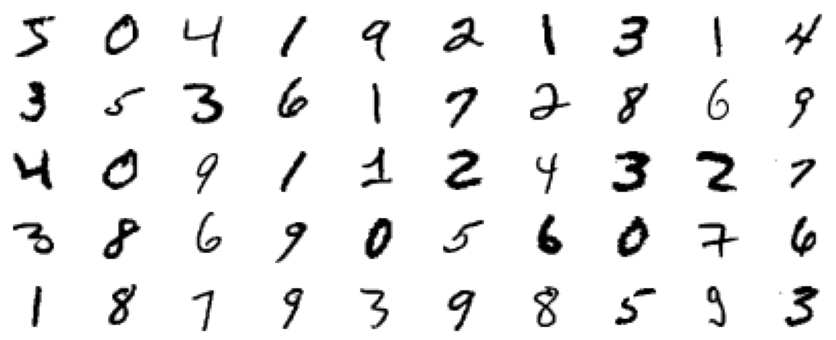

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


def show(images):
    plt.figure(figsize=(15, 6))

    for i in range(len(images)):
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray_r')
        plt.axis('off')

    plt.show()


show(x[:50])

In [3]:
def get_model():

    encoder = keras.models.Sequential([
        keras.layers.Conv2D(filters=32,
                            kernel_size=3,
                            strides=1,
                            padding='same'),
        keras.layers.LeakyReLU(),
        keras.layers.Conv2D(filters=64,
                            kernel_size=3,
                            strides=2,
                            padding='same'),
        keras.layers.LeakyReLU(),
        keras.layers.Conv2D(filters=64,
                            kernel_size=3,
                            strides=2,
                            padding='same'),
        keras.layers.LeakyReLU(),
        keras.layers.Conv2D(filters=64,
                            kernel_size=3,
                            strides=1,
                            padding='same'),
        keras.layers.LeakyReLU(),
        keras.layers.Flatten(),
    ])

    decoder = keras.models.Sequential([
        keras.layers.Dense(7 * 7 * 64),
        keras.layers.Reshape((7, 7, 64)),
        keras.layers.Conv2DTranspose(filters=64,
                                     kernel_size=3,
                                     strides=1,
                                     padding='same'),
        keras.layers.LeakyReLU(),
        keras.layers.Conv2DTranspose(filters=64,
                                     kernel_size=3,
                                     strides=2,
                                     padding='same'),
        keras.layers.LeakyReLU(),
        keras.layers.Conv2DTranspose(filters=32,
                                     kernel_size=3,
                                     strides=2,
                                     padding='same'),
        keras.layers.LeakyReLU(),
        keras.layers.Conv2DTranspose(filters=1,
                                     kernel_size=3,
                                     strides=1,
                                     padding='same'),
        keras.layers.Activation('sigmoid'),
    ])

    input = keras.layers.Input(shape=(28, 28, 1))

    hidden = encoder(input)

    #两个全连接层
    hidden_mu = keras.layers.Dense(2)(hidden)
    hidden_log_var = keras.layers.Dense(2)(hidden)

    #采样层,本身没有参数
    def f(args):
        mu, log_var = args
        epsilon = keras.backend.random_normal(shape=keras.backend.shape(mu),
                                              mean=0.,
                                              stddev=1.)
        return mu + keras.backend.exp(log_var / 2) * epsilon

    hidden = keras.layers.Lambda(f)([hidden_mu, hidden_log_var])

    output = decoder(hidden)

    model = keras.models.Model(input, output)

    return model, hidden_mu, hidden_log_var


model, hidden_mu, hidden_log_var = get_model()

model, hidden_mu, hidden_log_var

(<keras.engine.training.Model at 0x7f7c82f2bef0>,
 <tf.Tensor 'dense_2/BiasAdd:0' shape=(?, 2) dtype=float32>,
 <tf.Tensor 'dense_3/BiasAdd:0' shape=(?, 2) dtype=float32>)



Epoch 1/5
   32/60000 [..............................] - ETA: 18:36 - loss: 231.39230


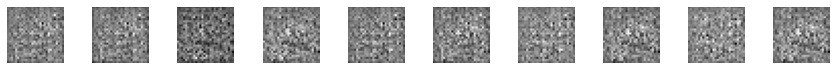

  352/60000 [..............................] - ETA: 2:59 - loss: 224.5780

/root/anaconda3/envs/gdl/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129088). Check your callbacks.
  % delta_t_median)


32032/60000 [===============>..............] - ETA: 17s - loss: 62.19281000


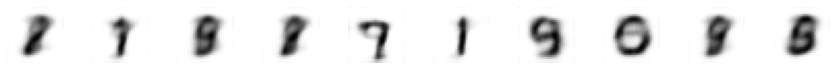

60000/60000 [==============================] - 38s 634us/step - loss: 58.2453
Epoch 2/5
   32/60000 [..............................] - ETA: 47s - loss: 50.83110


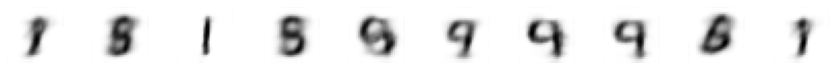

  256/60000 [..............................] - ETA: 1:31 - loss: 52.4664

/root/anaconda3/envs/gdl/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206668). Check your callbacks.
  % delta_t_median)
/root/anaconda3/envs/gdl/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103759). Check your callbacks.
  % delta_t_median)


31968/60000 [==============>...............] - ETA: 18s - loss: 52.14461000


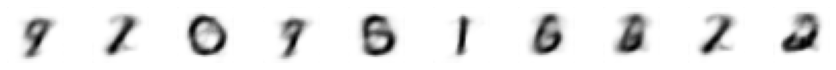

60000/60000 [==============================] - 38s 642us/step - loss: 51.6979
Epoch 3/5
   32/60000 [..............................] - ETA: 45s - loss: 51.08250


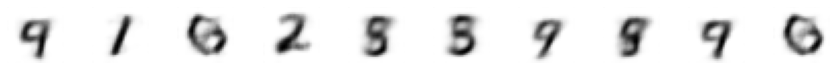

  256/60000 [..............................] - ETA: 1:25 - loss: 52.1489

/root/anaconda3/envs/gdl/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200421). Check your callbacks.
  % delta_t_median)
/root/anaconda3/envs/gdl/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100699). Check your callbacks.
  % delta_t_median)


32032/60000 [===============>..............] - ETA: 17s - loss: 50.27631000


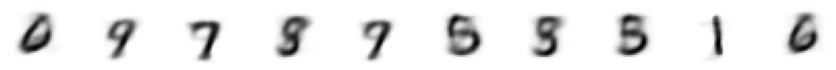

60000/60000 [==============================] - 38s 626us/step - loss: 50.1368
Epoch 4/5
   32/60000 [..............................] - ETA: 41s - loss: 45.21380


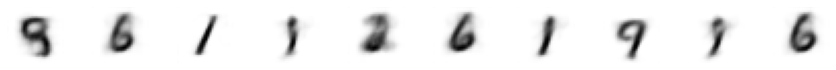

  352/60000 [..............................] - ETA: 1:11 - loss: 49.3418

/root/anaconda3/envs/gdl/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200742). Check your callbacks.
  % delta_t_median)
/root/anaconda3/envs/gdl/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100791). Check your callbacks.
  % delta_t_median)


32032/60000 [===============>..............] - ETA: 17s - loss: 49.26321000


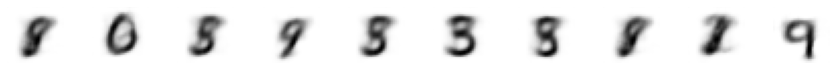

60000/60000 [==============================] - 37s 625us/step - loss: 49.1858
Epoch 5/5
   32/60000 [..............................] - ETA: 38s - loss: 46.92910


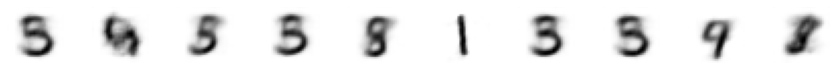

  256/60000 [..............................] - ETA: 1:46 - loss: 48.7314

/root/anaconda3/envs/gdl/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.297507). Check your callbacks.
  % delta_t_median)
/root/anaconda3/envs/gdl/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149175). Check your callbacks.
  % delta_t_median)


31968/60000 [==============>...............] - ETA: 18s - loss: 48.55921000


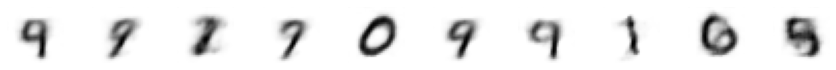

60000/60000 [==============================] - 39s 656us/step - loss: 48.5385


In [4]:
def get_loss(y_true, y_pred):
    loss_r = keras.backend.mean(keras.backend.square(y_true - y_pred),
                                axis=[1, 2, 3]) * 1000

    loss_kl = -0.5 * keras.backend.sum(
        1 + hidden_log_var - keras.backend.square(hidden_mu) -
        keras.backend.exp(hidden_log_var),
        axis=1)

    return loss_r + loss_kl


model.compile(optimizer=keras.optimizers.Adam(lr=5e-4), loss=get_loss)


#lr decay,实际上没有使用
def step_decay_schedule(epoch):
    return 5e-4


#在训练过程中打印预测图片
class CustomCallback(keras.callbacks.Callback):

    def on_batch_end(self, batch, logs):
        if batch % 1000 == 0:
            print(batch)
            pred = model.layers[-1].predict(np.random.randn(10, 2))
            show(pred)


model.fit(x,
          x,
          batch_size=32,
          epochs=5,
          callbacks=[
              keras.callbacks.LearningRateScheduler(step_decay_schedule),
              CustomCallback()
          ])

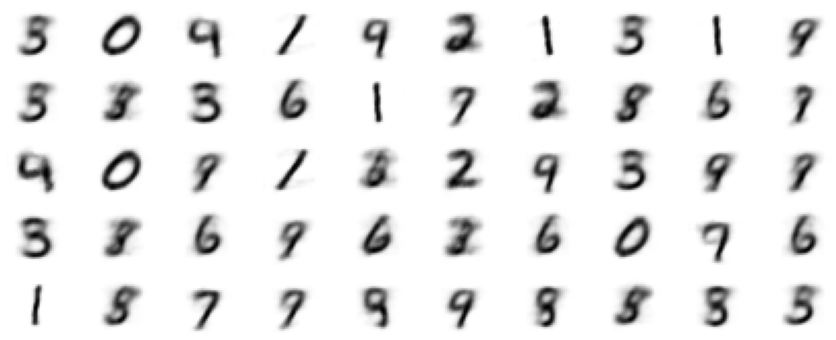

In [5]:
#重建
pred = model.predict(x[:50])

show(pred)

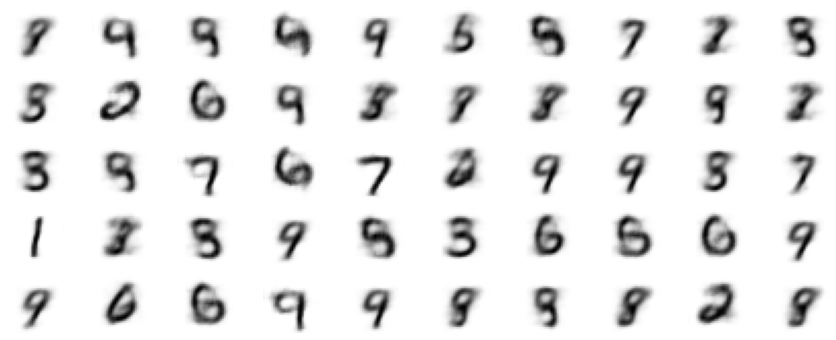

In [6]:
#生成
pred = model.layers[-1].predict(np.random.randn(50, 2))

show(pred)